<a href="https://colab.research.google.com/github/GeorgeTelles/stock_vs_bdr/blob/main/Stock_vs_BDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

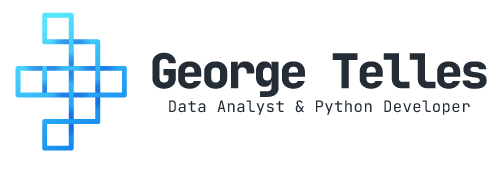

# **Qual é mais vantajoso? Investir via BDR ou diretamente na Ação?**

<img src="https://www.parmais.com.br/wp-content/uploads/BDRs-nao-patrocinados.png" width="700" align="left"/>

Neste estudo utilizarei o Python para automatizar a geração de um relatório que vai nos ajudar na tomada de decisão desse tipo de  investimento. Respondendo se existe uma vantagem financeira em investir na mesma empresa em alguma dessas modalidade. Decidi tambem utilizar a ação da apple neste exemplo.

# 0. Importação das bibliotecas

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# 1. Captura dos dados

In [ ]:
apple = yf.download(['AAPL34.SA', 'AAPL'], start = '2022-01-01')['Adj Close']

In [ ]:
apple = apple.dropna()

In [ ]:
apple_normalizado = apple/apple.iloc[0]

In [ ]:
apple_normalizado.plot();

# 2. Criando função para análise de várias janelas de tempo

In [ ]:
def compara_ativos(inicio):
  dados = yf.download(['AAPL34.SA', 'AAPL'], start = inicio, progress = False)['Adj Close']
  dados = dados.dropna()
  dados = dados/dados.iloc[0]
  dados.plot();
  plt.title(f'Comparação desde {inicio} até hoje')

# 3. Criando loop para geração do relatório

In [ ]:
datas = ['2018-01-01', '2019-01-01','2020-01-01','2021-01-01','2022-01-01','2023-01-01']

In [ ]:
relatorio = PdfPages('relatorio_acao_vs_bdr.pdf')

for data in datas:
  relatorio.savefig(compara_ativos(data))
relatorio.close()

Analisando de forma simplista, investir na empresa Apple via BDR proporcionaria mais rentabilidade, porem, será que essa rentabilidade é atrelada ao papel ou a valorização do cambio, visto que o papel original é cotado em dolar e o BDR é cotado em Reais tendo como base o preço do Papel em dolar. Vamos analisar isso.

# 4. Mensurar o impacto do câmbio

In [ ]:
dados = yf.download(['AAPL34.SA', 'AAPL', 'USDBRL=X'], start = '2017-01-03')['Adj Close']

In [ ]:
dados = dados.dropna()

Criar nova coluna para encontrar o preço de AAPL em reais

In [ ]:
dados['Apple_reais'] = dados['AAPL'] * dados['USDBRL=X']

Normalizar todo o dataframe

In [ ]:
dados_normalizados = dados/dados.iloc[0]

Agora temos o Preço da Apple com a volatilidade do Cambio entre Dolar e Real.

In [ ]:
dados_normalizados[['AAPL34.SA', 'Apple_reais']].plot()

# Conclusão:
Após analisar o impacto do câmbio (USD/BRL) nos investimentos em ações internacionais via BDR e diretamente, concluímos que não há uma diferença substancial de rentabilidade entre as duas abordagens. A principal distinção reside na exposição ao câmbio: ao optar por BDRs, você está automaticamente sujeito às flutuações cambiais, o que pode afetar sua rentabilidade de forma imediata conforme o câmbio varia. Por outro lado, ao investir diretamente na empresa, como a Apple, o efeito do câmbio só se manifesta no momento da conversão de seus investimentos de dólares para reais. Essa diferenciação é crucial para investidores que buscam compreender como a volatilidade cambial pode influenciar suas estratégias de investimento, permitindo uma tomada de decisão mais informada e alinhada com seus objetivos financeiros de longo prazo.